In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
import plotly.tools as tls
import seaborn as sns
import matplotlib.patches as mpatches
import math
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model

py.plotly.tools.set_credentials_file(username='mpeyrotc', api_key='pNScWhvJN9woL3frF4Vd')
%matplotlib inline

## Principal Components Selection

In [3]:
R3P = pd.ExcelFile("R3P Q2 Mayo (ADV).xlsx")
R3P_1 = R3P.parse("R3P Q2 Mayo")

R3P_1 = R3P_1.ix[4:,3:31]

R3P_1.columns=['Weekday', 'Time', 'Act. WPs', 'Dia.WPs', 'RFC WPs', 'CPU Usr',
            'CPU Sys', 'CPU Idle', 'Paging in', 'Paging out', 'Free Mem.', 
            'EM alloc.', 'EM attach.', 'Em global', 'Heap Memor', 'Private Modes',
            'Paging Mem', 'Roll Mem', 'Logins', 'Sessions', '# Pasos Dialogo',
            'Resp. Time (Total)', 'CPU (Total)', 'CPU (Prom)', 'BD (Total)', 
            'BD (Prom)', 'Response Time (Prom)', 'Label']

R3P_1.dropna(how="all", inplace=True)
R3P_1['Time'] = R3P_1['Time'].astype(str).apply(lambda x: str(x[0]) + str(x[1]))

X = R3P_1.ix[:,0:-1]
X = X.apply(pd.to_numeric, errors='coerce')

X = X.values

In [4]:
X_std = StandardScaler().fit_transform(X)

In [5]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs[0])
#print('\nEigenvalues \n%s' %eig_vals)
#print('\nCovariance \n%s' %cov_mat[0])

In [6]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [7]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
#print('Eigenvalues in descending order:')
#for i in eig_pairs:
#    print(i[0])

In [8]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

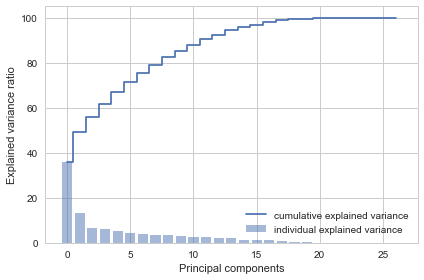

In [9]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(27), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(27), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## PCA Analysis

In [11]:
PCAs = pd.ExcelFile("PCAs.xlsx")
F1F2 = PCAs.parse("F1F2")

F1F2_X = F1F2.ix[104:130,1:28]

columns = []
for i in xrange(0,27):
    columns.append("F" + str(i + 1))

F1F2_X.columns=columns

F1F2_y = F1F2.ix[104:130,0:1]

### Components F1 and F2

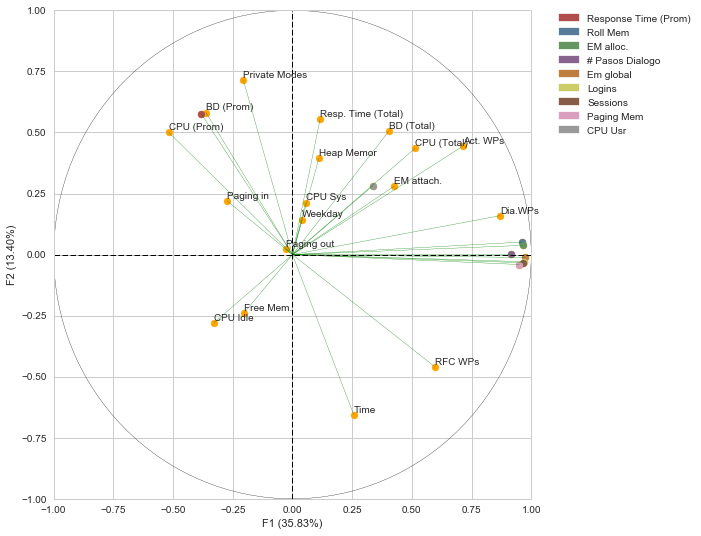

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7.5, 7.5))
    plt.scatter(F1F2_X.T.values[0], F1F2_X.T.values[1], c="Orange")
    plt.ylabel('F2 (13.40%)')
    plt.xlabel('F1 (35.83%)')
    plt.tight_layout()
    axes = plt.gca()
    axes.set_xlim([-1,1])
    axes.set_ylim([-1,1])
    
    discriminators = [26, 17, 11, 20, 13, 18, 19, 16, 5]
    colors = sns.color_palette("Set1", n_colors=len(discriminators), desat=.5)
    
    for x,y,closest,label in zip(F1F2_X.T.values[0], F1F2_X.T.values[1], range(0,27), F1F2_y.T.values[0]):
        plt.plot([0,x], [0, y], '-', linewidth=0.3, c="Green")
        if closest not in  discriminators:
            plt.annotate(label, xy=(x, y), xytext=(x, y + 0.01))

    legend = []
    for index, color in zip(discriminators, colors.as_hex()):
        plt.scatter(F1F2_X.T.values[0][index], F1F2_X.T.values[1][index], c=color)
        legend.append(mpatches.Patch(color=color, label=F1F2_y.T.values[0][index]))
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=legend)
    
    plt.plot([-1, 1], [0, 0], '--', linewidth=1, c="Black")
    plt.plot([0, 0], [-1, 1], '--', linewidth=1, c="Black")
    circle = plt.Circle((0, 0), 1, color='Black', fill=False)
    plt.gcf().gca().add_artist(circle)
    
    plt.show()
    
    #mpl_fig1 = plt.gcf()
    #py_fig1 = tls.mpl_to_plotly(mpl_fig1)
    #py.iplot(py_fig1, filename='pcas')
    #tls.embed("https://plot.ly/~mpeyrotc/0") 

### Components F1 and F3

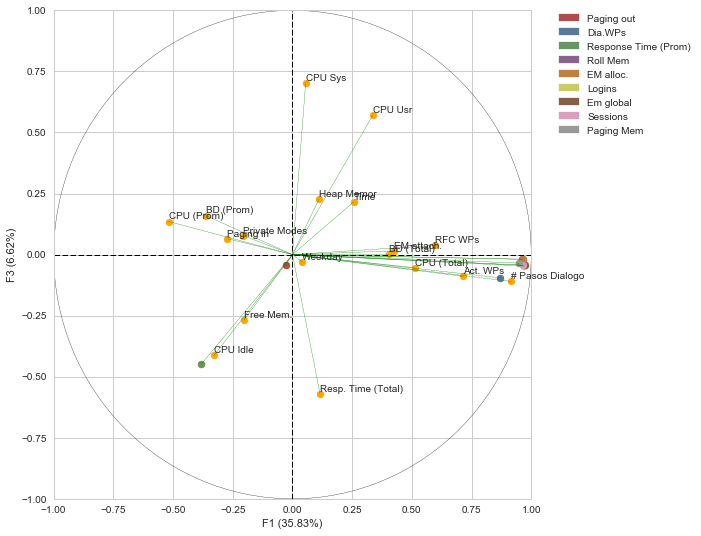

In [13]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7.5, 7.5))
    
    plt.scatter(F1F2_X.T.values[0], F1F2_X.T.values[2], c="Orange")
    plt.ylabel('F3 (6.62%)')
    plt.xlabel('F1 (35.83%)')
    plt.tight_layout()
    axes = plt.gca()
    axes.set_xlim([-1,1])
    axes.set_ylim([-1,1])
    
    discriminators = [9, 3, 26, 17, 11, 18, 13, 19, 16]
    colors = sns.color_palette("Set1", n_colors=len(discriminators), desat=.5)
    
    for x,y,closest,label in zip(F1F2_X.T.values[0], F1F2_X.T.values[2], range(0,27), F1F2_y.T.values[0]):
        plt.plot([0,x], [0, y], '-', linewidth=0.3, c="Green")
        if closest not in  discriminators:
            plt.annotate(label, xy=(x, y), xytext=(x, y + 0.01))
            
    legend = []
    for index, color in zip(discriminators, colors.as_hex()):
        plt.scatter(F1F2_X.T.values[0][index], F1F2_X.T.values[2][index], c=color)
        legend.append(mpatches.Patch(color=color, label=F1F2_y.T.values[0][index]))
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=legend)
    
    plt.plot([-1, 1], [0, 0], '--', linewidth=1, c="Black")
    plt.plot([0, 0], [-1, 1], '--', linewidth=1, c="Black")
    circle = plt.Circle((0, 0), 1, color='Black', fill=False)
    plt.gcf().gca().add_artist(circle)
    
    plt.show()

### Components F2 and F3

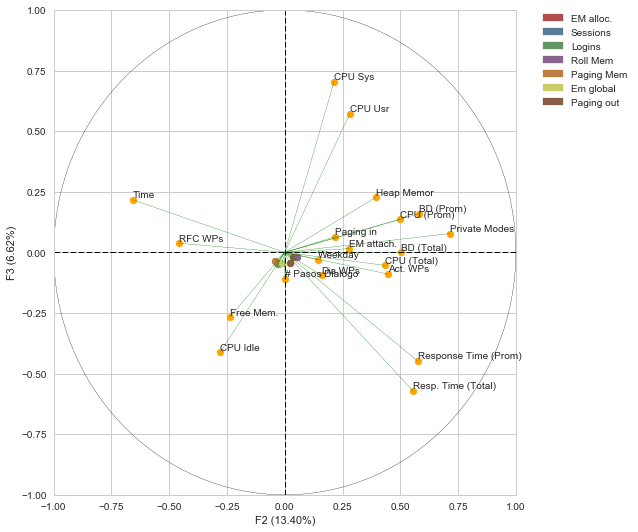

In [14]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(7.5, 7.5))
    plt.scatter(F1F2_X.T.values[1], F1F2_X.T.values[2], c="Orange")
    plt.ylabel('F3 (6.62%)')
    plt.xlabel('F2 (13.40%)')
    plt.tight_layout()
    axes = plt.gca()
    axes.set_xlim([-1,1])
    axes.set_ylim([-1,1])
    
    discriminators = [11, 19, 18, 17, 16, 13, 9]
    colors = sns.color_palette("Set1", n_colors=len(discriminators), desat=.5)
    
    for x,y,closest,label in zip(F1F2_X.T.values[1], F1F2_X.T.values[2], range(0,27), F1F2_y.T.values[0]):
        plt.plot([0,x], [0, y], '-', linewidth=0.3, c="Green")
        if closest not in  discriminators:
            plt.annotate(label, xy=(x, y), xytext=(x, y + 0.01))
            
    legend = []
    for index, color in zip(discriminators, colors.as_hex()):
        plt.scatter(F1F2_X.T.values[1][index], F1F2_X.T.values[2][index], c=color)
        legend.append(mpatches.Patch(color=color, label=F1F2_y.T.values[0][index]))
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=legend)
    
    plt.plot([-1, 1], [0, 0], '--', linewidth=1, c="Black")
    plt.plot([0, 0], [-1, 1], '--', linewidth=1, c="Black")
    circle = plt.Circle((0, 0), 1, color='Black', fill=False)
    plt.gcf().gca().add_artist(circle)

    plt.tight_layout()
    
    plt.show()

## Selecció de variables críticas y reducción de dimensiones

Basado en los resultados eobtenidos en las gráficas anteriores, se determinó que las siguientes variables están correlacionadas a Response Time (promedio) de acuerdo al componente principal F1F2:

1. BD (Prom)
2. CPU(Prom)
3. Private modes
4. RFC WPs
5. Time

De la misma forma, se determinó que por el componente F1 y F3 las siguientes variables también se correlacionan con response time (promedio):

6. CPU Idle
7. CPU Usr

A continuación se muestran las gráficas de comportamiento de cada uno con respecto a response time. Las gráficas naranjas representan una relación visible de relevancia.

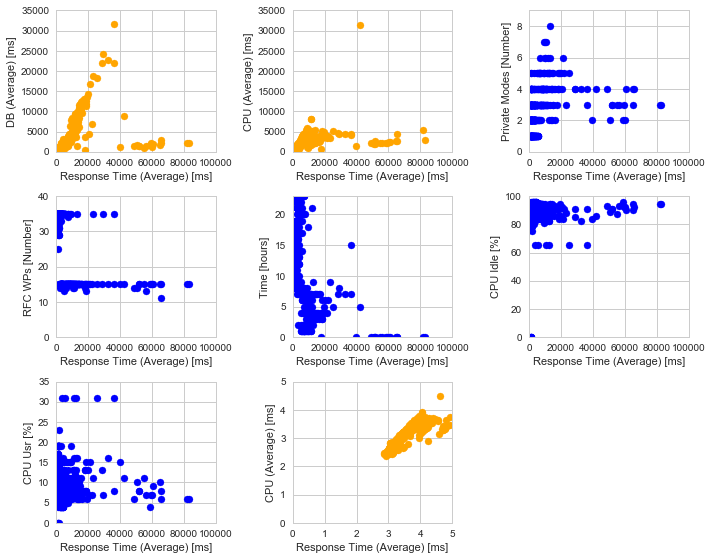

In [15]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    
    plt.subplot(4, 3, 1)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,35000])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["BD (Prom)"].T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('DB (Average) [ms]')
    
    plt.subplot(4, 3, 2)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,35000])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["CPU (Prom)"].T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU (Average) [ms]')
    
    plt.subplot(4, 3, 3)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,9])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["Private Modes"].T, c="Blue")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('Private Modes [Number]')
    
    plt.subplot(4, 3, 4)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,40])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["RFC WPs"].T, c="Blue")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('RFC WPs [Number]')
    
    plt.subplot(4, 3, 5)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,23])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["Time"].T, c="Blue")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('Time [hours]')
    
    plt.subplot(4, 3, 6)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,100])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["CPU Idle"].T, c="Blue")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU Idle [%]')
    
    plt.subplot(4, 3, 7)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,35])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["CPU Usr"].T, c="Blue")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU Usr [%]')
    
    response_time = R3P_1["Response Time (Prom)"].apply(math.log10)
    cpu_prom = R3P_1["CPU (Prom)"].apply(math.log10)
    
    plt.subplot(4, 3, 8)
    axes = plt.gca()
    axes.set_xlim([0,5])
    axes.set_ylim([0,5])
    plt.scatter(response_time.T, cpu_prom.T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU (Average) [ms]')
    
    plt.tight_layout()
    plt.show()

Ya que hemos seleccionado DB (Prom) y CPU(Prom) como variables potenciales para mejorar el rendimiento del sistema, a continueación se proponen funciones matemáticas representativas del comportamiento del sistema.

In [26]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 4))
    
    x = R3P_1.loc[:,"Response Time (Prom)"][:, np.newaxis]
    y = R3P_1.loc[:,"BD (Prom)"]
    
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    
    plt.subplot(1, 3, 1)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,35000])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["BD (Prom)"].T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('DB (Average) [ms]')
    plt.plot(x, regr.predict(x), color='blue', linewidth=1)
    plt.text(21500, 33000, r'Equation: $y={coef}x+{intercept}$'.format(coef="{0:.2f}".format(regr.coef_[0]), 
                                                                       intercept="{0:.2f}".format(regr.intercept_)),
             fontsize=12, style='italic', bbox={'facecolor':'gray', 'alpha':0.1, 'pad':2})
    plt.title("Response Time vs. DB (Average)")

    x = R3P_1.loc[:,"Response Time (Prom)"][:, np.newaxis]
    y = R3P_1.loc[:,"CPU (Prom)"]

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    plt.subplot(1, 3, 2)
    axes = plt.gca()
    axes.set_xlim([0,100000])
    axes.set_ylim([0,35000])
    plt.scatter(R3P_1["Response Time (Prom)"].T, R3P_1["CPU (Prom)"].T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU (Average) [ms]')
    plt.plot(x, regr.predict(x), color='blue', linewidth=1)
    plt.text(21300, 33000, r'Equation: $y={coef}x+{intercept}$'.format(coef="{0:.2f}".format(regr.coef_[0]), 
                                                                       intercept="{0:.2f}".format(regr.intercept_)),
             fontsize=12, style='italic', bbox={'facecolor':'gray', 'alpha':0.1, 'pad':2})
    plt.title("Response Time vs. CPU (Average)")
    
    x = response_time[:, np.newaxis]
    y = cpu_prom

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    plt.subplot(1, 3, 3)
    axes = plt.gca()
    axes.set_xlim([0,5])
    axes.set_ylim([0,5])
    plt.scatter(response_time.T, cpu_prom.T, c="Orange")
    plt.xlabel('Response Time (Average) [ms]')
    plt.ylabel('CPU (Average) [ms]')
    plt.plot(x, regr.predict(x), color='blue', linewidth=1)
    plt.text(1.5, 4.7, r'Equation: $y={coef}x+{intercept}$'.format(coef="{0:.2f}".format(regr.coef_[0]), 
                                                                       intercept="{0:.2f}".format(regr.intercept_)),
             fontsize=12, style='italic', bbox={'facecolor':'gray', 'alpha':0.1, 'pad':2})
    plt.title("Response Time vs. CPU (Average) in log scale")
    
    plt.tight_layout()
    plt.show()

NameError: name 'linear_model' is not defined

# Marco

# Juan Carlos

## B) Análisis estadístico descriptivo

Debido a que encontramos no una, sino dos variables críþicas, (BD y CPU), se analizarán ambas, para ver cuál de las dos es más confiable. Se obtendrá la media, varianza, desviación estándar, la simetría y la curtosis para cada una de las variables.

In [ ]:
print("CPU (Prom):\n")
print "Media:\t\t\t", R3P_1["CPU (Prom)"].mean()
print "Varianza:\t\t", R3P_1["CPU (Prom)"].var()
print "Desviación estándar:\t", R3P_1["CPU (Prom)"].std()
print "Simetría:\t\t", R3P_1["CPU (Prom)"].skew()
print "Kurtosis:\t\t", R3P_1["CPU (Prom)"].kurtosis()
print
print("BD (Prom):\n")
print "Media:\t\t\t", R3P_1["BD (Prom)"].mean()
print "Varianza:\t\t", R3P_1["BD (Prom)"].var()
print "Desviación estándar:\t", R3P_1["BD (Prom)"].std()
print "Simertía:\t\t", R3P_1["BD (Prom)"].skew()
print "Kurtosis:\t\t", R3P_1["BD (Prom)"].kurtosis()

Se puede notar con facilidad que ambas variables tienen una cola pesada, pues la kurtosis es mayor a 3. En seguida se muestra un histograma de las variables.

In [ ]:
import numpy as np
import pylab as p

data=R3P_1["CPU (Prom)"]
y,binEdges=np.histogram(data,bins=100)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
p.plot(bincenters,y,'-', label="CPU (Prom)")

data=R3P_1["BD (Prom)"]
y,binEdges=np.histogram(data,bins=100)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
p.plot(bincenters,y,'-', label="BD (Prom)")

p.legend(loc='upper right')

p.show()

Se puede observar que ambas variables tienen una forma similar a la de una distribución exponencial.

## c)	Determinación de la normalidad de los datos
 En seguida se mostrará una comparación de los datos de ambas variables anteriormente analizadas contra la distribución exponencial. Originalmente, la indicación era probarla contra la distribución normal, pero como se vio que tenían comportamientos similares a las exponenciales, se decició comparar contra ella.

In [ ]:
from scipy.stats import expon
from scipy.stats import norm

expectedValues = pd.Series(range(1 ,R3P_1["CPU (Prom)"].count() + 1)).apply(lambda x: (x - 0.5) / R3P_1["CPU (Prom)"].count()).apply(lambda x: expon.ppf(x))
sortedValues = pd.Series(R3P_1["CPU (Prom)"].sort_values()).reset_index(drop=True)


# Create a trace
trace = Scatter(
    x = expectedValues,
    y = sortedValues,
    mode = 'markers'
)

layout = Layout(
    title='CPU (Prom)',
    xaxis=dict(
        title='Valor estándar para cuantil exponencial'
        
    ),
    yaxis=dict(
        title='Valor obtenido'
    )
)

data = [trace]

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='Comparación con exponencial')

In [ ]:
expectedValues = pd.Series(range(1 ,R3P_1["BD (Prom)"].count() + 1)).apply(lambda x: (x - 0.5) / R3P_1["BD (Prom)"].count()).apply(lambda x: expon.ppf(x))
sortedValues = pd.Series(R3P_1["BD (Prom)"].sort_values()).reset_index(drop=True)


# Create a trace
trace = Scatter(
    x = expectedValues,
    y = sortedValues,
    mode = 'markers'
)

layout = Layout(
    title='BD (Prom)',
    xaxis=dict(
        title='Valor estándar para cuantil exponencial'
        
    ),
    yaxis=dict(
        title='Valor obtenido'
    )
)

data = [trace]

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='Comparación con exponencial')

Se puede observar que ambas gráficas tienen una forma que podría, de cierta forma, describir a una línea recta, por lo que se puede decir que, en efecto, tienen una distribución siimilar a la exponencial. Sin embargo, es notorio que la variable de BD forma algo similar a una 'S' invertida, lo cual corresponde a una distribución de cola pesada. Si quisieramos compararlo con distribuciones normales, las grficas seran las siguientes:

In [ ]:
from scipy.stats import expon
from scipy.stats import norm

expectedValues = pd.Series(range(1 ,R3P_1["CPU (Prom)"].count() + 1)).apply(lambda x: (x - 0.5) / R3P_1["CPU (Prom)"].count()).apply(lambda x: norm.ppf(x))
sortedValues = pd.Series(R3P_1["CPU (Prom)"].sort_values()).reset_index(drop=True)


# Create a trace
trace = Scatter(
    x = expectedValues,
    y = sortedValues,
    mode = 'markers'
)

layout = Layout(
    title='CPU (Prom)',
    xaxis=dict(
        title='Valor estándar para cuantil normal'
        
    ),
    yaxis=dict(
        title='Valor obtenido'
    )
)

data = [trace]

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='Comparación con normal')

In [ ]:
expectedValues = pd.Series(range(1 ,R3P_1["BD (Prom)"].count() + 1)).apply(lambda x: (x - 0.5) / R3P_1["BD (Prom)"].count()).apply(lambda x: norm.ppf(x))
sortedValues = pd.Series(R3P_1["BD (Prom)"].sort_values()).reset_index(drop=True)


# Create a trace
trace = Scatter(
    x = expectedValues,
    y = sortedValues,
    mode = 'markers'
)

layout = Layout(
    title='BD (Prom)',
    xaxis=dict(
        title='Valor estándar para cuantil normal'
        
    ),
    yaxis=dict(
        title='Valor obtenido'
    )
)

data = [trace]

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='Comparación con normal')

Como se puede ver, en vez de parecer líneas rectas, parecen curvas, lo que da a entender que, si lo compararamos con distribuciones normales, serían distribuciones asimétricas, lo cual siguiere que los datos no son "normales"

# Oliver

In [31]:
CPU_Prom_Trace = pd.ExcelFile("CPU Prom Trace.xlsx")
CPU_Prom_Trace_1 = CPU_Prom_Trace.parse("CPU Prom")

CPU_Prom_Trace_1 = CPU_Prom_Trace_1.ix[0:,:]

CPU_Prom_Trace_1.head()

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Diciembre,Enero.1,Febrero.1,Marzo.1
0,4172.292528,1819.451924,5546.163569,979.388848,383.889936,5640.932894,329.660023,1824.524539,1959.689185,764.307677,2122.837335,1163.178195,5556.006870
1,1481.270007,2710.161820,1226.539361,4069.833601,1674.042801,1172.929056,415.205263,3508.549477,1400.395003,631.249651,104.772502,287.996393,476.849896
2,592.677883,4491.343345,1193.767247,1288.718898,5576.172085,572.476299,2118.440905,6093.975456,2668.673799,367.361209,3860.547882,94.823514,2393.484874
3,5984.091227,4877.865078,1677.756844,1850.238528,3778.551430,2571.585238,2622.266639,4049.869657,4918.778405,3738.751963,104.256316,186.290721,4633.539914
4,291.950365,1865.324390,4196.510996,392.047687,769.588776,745.778987,5236.382160,1928.858661,7067.503880,1151.197781,9848.772989,2408.925378,1628.289199


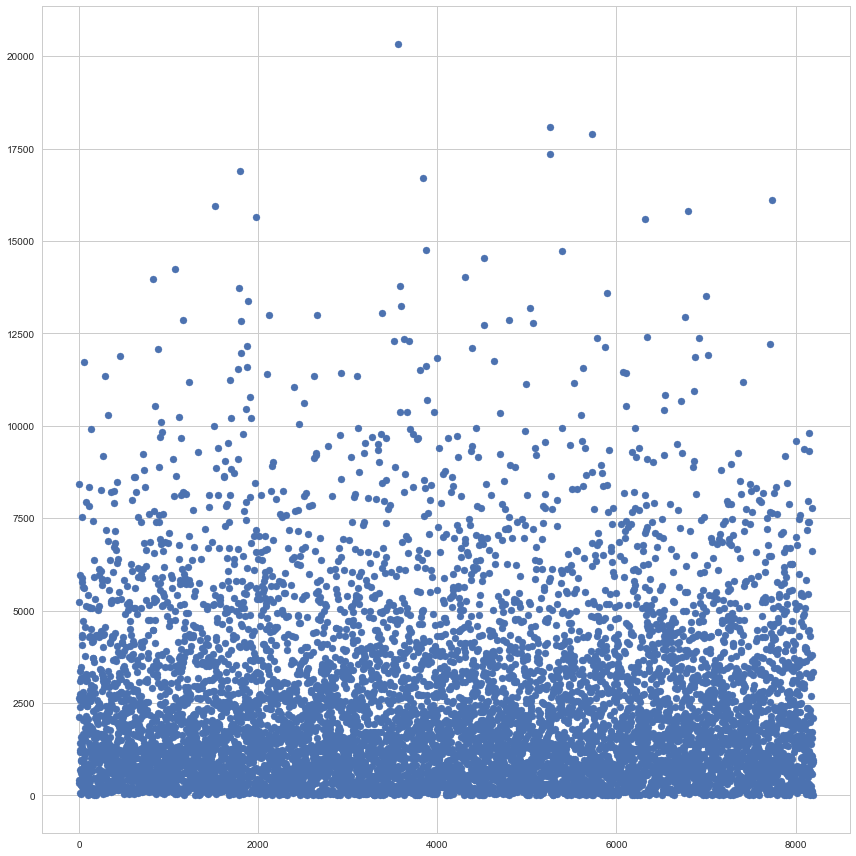

In [42]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 12))
    
    plt.scatter(range(0, len(CPU_Prom_Trace_1.index)), CPU_Prom_Trace_1["Julio"].T)
    
    plt.tight_layout()
    plt.show()